In [1]:
import torch
import torchvision as torchv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import Tensor
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np



In [2]:
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0].parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

import lossFunctions

CROSS ENTROPY LOSS

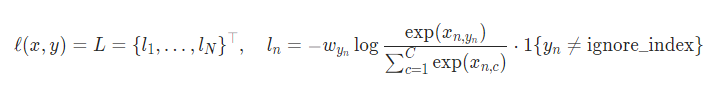

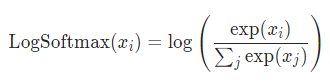

In [3]:
def zeroOneLoss(outputs, labels):
    return [1 if x[y] > 0 else 0 for x,y in zip(outputs ,labels)]

In [4]:
xList = torch.randn(3, 2, requires_grad=True)
yList = torch.empty(3, dtype=torch.long).random_(2)

print(xList)
print(yList)
print([1 if x[y] > 0 else 0 for x,y in zip(xList ,yList)])

tensor([[-1.0293,  1.3674],
        [ 1.8143, -0.5483],
        [-1.0245,  1.7253]], requires_grad=True)
tensor([1, 0, 1])
[1, 1, 1]


In [5]:
classes = 2
numberOfInput = 10

input = torch.randn(numberOfInput, classes, requires_grad=True)
target = torch.empty(numberOfInput, dtype=torch.long).random_(classes)

# input = torch.FloatTensor([[0.5, 0.7], [0.2, 0.6]]).to('cuda')
# target = torch.LongTensor([0,1]).to('cuda')

zeroOne = lossFunctions.ZeroOneLoss()
cross_entropy_loss = nn.CrossEntropyLoss()
output = cross_entropy_loss(input, target)
output1 = lossFunctions.crossEntropyLoss(input, target)
output2 = zeroOne(input, target)
output.backward()
output1.backward()
output2.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)
print('output cross: ', output1)
print('output zeroOne: ', output2)

input:  tensor([[ 0.5304,  1.5559],
        [-0.8972,  0.1807],
        [-0.2600,  1.0295],
        [ 2.0477, -0.2178],
        [ 1.1189,  1.0125],
        [-0.2202, -0.8361],
        [ 0.1184, -1.1038],
        [ 1.2249,  2.0254],
        [-0.8624, -0.8341],
        [-0.7677,  0.5989]], requires_grad=True)
target:  tensor([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])
output:  tensor(1.0731, grad_fn=<NllLossBackward0>)
output cross:  tensor(1.0731, grad_fn=<DivBackward0>)
output zeroOne:  tensor(0.5000, requires_grad=True)
